#### Uptill part 4 I had a class imbalance. I decided to try out random oversampling, balance out the classes in the training set and check for improvements

In [1]:
# Load all necessary packages and libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import re

import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer



plt.style.use('bmh')
%matplotlib inline

In [2]:
job_data=pd.read_csv('text3_clean.csv',index_col=0)

In [3]:
X = job_data[['cleaned_article3']]
y = job_data.category_type
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42,stratify=y)
labels=['bank-accounts','car-loans','credit-cards','home-loans','personal-loans','savings-accounts','superannuation','term-deposits']

In [4]:
new_stop=stopwords.words('english')

titles_words=['loans','accounts','credit','cards','term','deposits','money',
              'save','loan','deposit','table','display','saving','account','ratecity','thelatest',
             'follow','get','news', 'article','australians','australia','aussies','card','first',
              
              'ceo','ratecitycomau','comparison', 'website','loansonline','mortgagerepayments','mortgagesk',
              'ournews','articlesto','getelementbyid','floor','window','iframe','offsetwidth','datawrapper','height'
              'undefined','typeof','px','embeddeltas','mathmax','iframestyleheightwindowdatawrapper','iframeoffsetwidth',
              'mathmin','say','mr','ratecomparison', 'ratechange','loaninterest', 'ratecomparison','rateaggregate','also',
              'melbourne','perth','australians','aussies','brisbane','sydney','hobart','darwin','canberra','regional',
              'adelaide','windowdatawrapper','adata', 'many','datawrapperheight']
new_stop.extend(titles_words)

## Logistic Regression As is


accuracy on train 0.9383910386965377

accuracy on test 0.8705463182897862

                   precision    recall  f1-score   support

   bank-accounts       1.00      0.26      0.41        39
       car-loans       1.00      0.67      0.80        30
    credit-cards       0.86      0.92      0.89       145
      home-loans       0.85      1.00      0.92       415
  personal-loans       1.00      0.11      0.19        19
savings-accounts       0.88      0.82      0.84       120
  superannuation       1.00      0.70      0.82        30
   term-deposits       1.00      0.82      0.90        44

       micro avg       0.87      0.87      0.87       842
       macro avg       0.95      0.66      0.72       842
    weighted avg       0.88      0.87      0.85       842



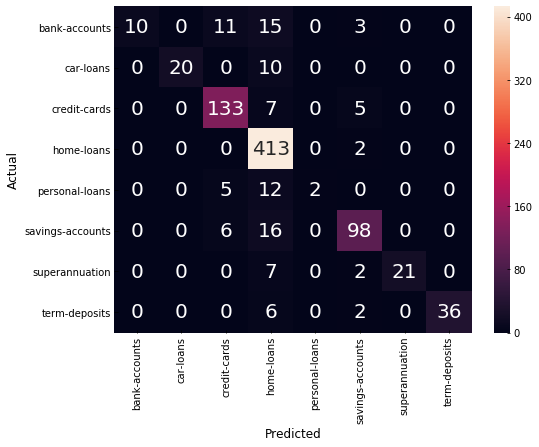

**************************************************************************************


In [5]:
text_clf_count = Pipeline([('vect', TfidfVectorizer(stop_words=new_stop,ngram_range=(1,2))),
                     ('clf1', LogisticRegression(random_state=42, solver='lbfgs',multi_class='multinomial'))])

text_clf_count.fit(X_train.cleaned_article3, y_train)
    
y_pred_train = text_clf_count.predict(X_train.cleaned_article3)
y_pred_test = text_clf_count.predict(X_test.cleaned_article3)
print('\naccuracy on train %s' % accuracy_score(y_train, y_pred_train))
print('\naccuracy on test %s' % accuracy_score(y_test, y_pred_test))
print('\n',classification_report(y_test, y_pred_test))

conf_mat = confusion_matrix(y_test, y_pred_test)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d'
            ,xticklabels=labels, yticklabels=labels,annot_kws={"size": 20})
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
    
    
print('*'*86)

So at this point I have an accuracy of the 87%



## Oversampling the minority classes

In [6]:
#Importing the oversampling function
from imblearn.over_sampling import RandomOverSampler

In [7]:
y_train.value_counts()

home-loans          969
credit-cards        339
savings-accounts    279
term-deposits       102
bank-accounts        90
car-loans            72
superannuation       69
personal-loans       44
Name: category_type, dtype: int64

In [8]:
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train, y_train)

In [9]:
X_res.shape

(7752, 1)

In [10]:
pd.value_counts(pd.Series(y_res))

superannuation      969
car-loans           969
home-loans          969
credit-cards        969
bank-accounts       969
term-deposits       969
personal-loans      969
savings-accounts    969
dtype: int64

In [11]:
X_ros_tr=pd.Series(X_res.flatten())

In [12]:
X_ros_test=X_test.cleaned_article3

In [13]:
y_ros_tr=pd.Series(y_res)


accuracy on train 0.9993550051599587

accuracy on test 0.9216152019002375

                   precision    recall  f1-score   support

   bank-accounts       0.70      0.77      0.73        39
       car-loans       1.00      0.83      0.91        30
    credit-cards       0.94      0.92      0.93       145
      home-loans       0.96      0.97      0.97       415
  personal-loans       0.72      0.68      0.70        19
savings-accounts       0.84      0.88      0.86       120
  superannuation       0.87      0.90      0.89        30
   term-deposits       1.00      0.91      0.95        44

       micro avg       0.92      0.92      0.92       842
       macro avg       0.88      0.86      0.87       842
    weighted avg       0.92      0.92      0.92       842



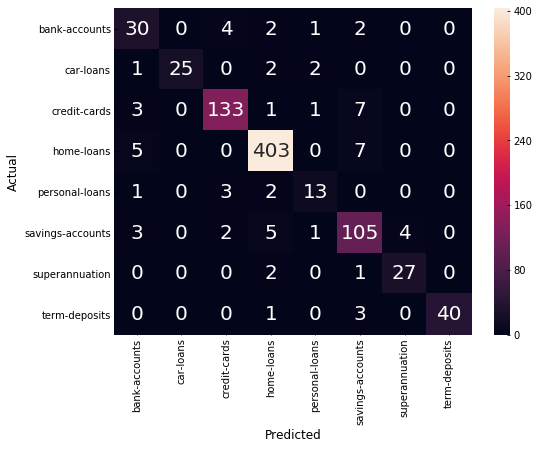

**************************************************************************************


In [14]:
#New CountVectorizer
text_clf_count = Pipeline([('vect', TfidfVectorizer(stop_words=new_stop,ngram_range=(1,2))),
                     ('clf1', LogisticRegression(random_state=42, solver='lbfgs',multi_class='multinomial'))])



text_clf_count.fit(X_ros_tr, y_ros_tr)
    
y_pred_train = text_clf_count.predict(X_ros_tr)
y_pred_test = text_clf_count.predict(X_ros_test)
print('\naccuracy on train %s' % accuracy_score(y_ros_tr, y_pred_train))
print('\naccuracy on test %s' % accuracy_score(y_test, y_pred_test))
print('\n',classification_report(y_test, y_pred_test))

conf_mat = confusion_matrix(y_test, y_pred_test)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d'
            ,xticklabels=labels, yticklabels=labels,annot_kws={"size": 20})
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
    
    
print('*'*86)

The model accuracy improved to 92%. At this point this will be my model I use to test on new datapoints 


### pickling the model

In [16]:
# text_clf_count.fit(job_data.cleaned_article3,job_data.category_type)

Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
... penalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False))])

In [111]:
import pickle

In [112]:
# Dump the trained decision tree classifier with Pickle
pipeline_mod_filename = 'balanced_pipeline.pkl'
# Open the file to save as pkl file
pipeline_mod_pkl = open(pipeline_mod_filename, 'wb')
pickle.dump(text_clf_count, pipeline_mod_pkl)
# Close the pickle instances
pipeline_mod_pkl.close()